# DIABETES DATASETS

## Problem Statement

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

## Data Gathering

In [2]:
df=pd.read_csv('diabetes.csv')
df[5:10]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,150,74,0,0,25.6,0.201,30,0
6,150,50,32,88,31.0,0.248,26,1
7,150,0,0,0,35.3,0.134,29,0
8,150,70,45,543,30.5,0.158,35,1
9,150,96,0,0,0.0,0.232,54,1


## EDA

In [3]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.147159,0.050780,0.311509,0.218281,0.135080,0.256608,0.463051
BloodPressure,0.147159,1.000000,0.205899,0.089904,0.281329,0.040546,0.236634,0.063007
SkinThickness,0.050780,0.205899,1.000000,0.436783,0.392573,0.183928,-0.119906,0.074752
Insulin,0.311509,0.089904,0.436783,1.000000,0.197859,0.185071,-0.051728,0.130548
BMI,0.218281,0.281329,0.392573,0.197859,1.000000,0.140647,0.034181,0.292695
DiabetesPedigreeFunction,0.135080,0.040546,0.183928,0.185071,0.140647,1.000000,0.036797,0.173844
Age,0.256608,0.236634,-0.119906,-0.051728,0.034181,0.036797,1.000000,0.238700
Outcome,0.463051,0.063007,0.074752,0.130548,0.292695,0.173844,0.238700,1.000000


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>, <AxesSubplot:>]],
      dtype=object)

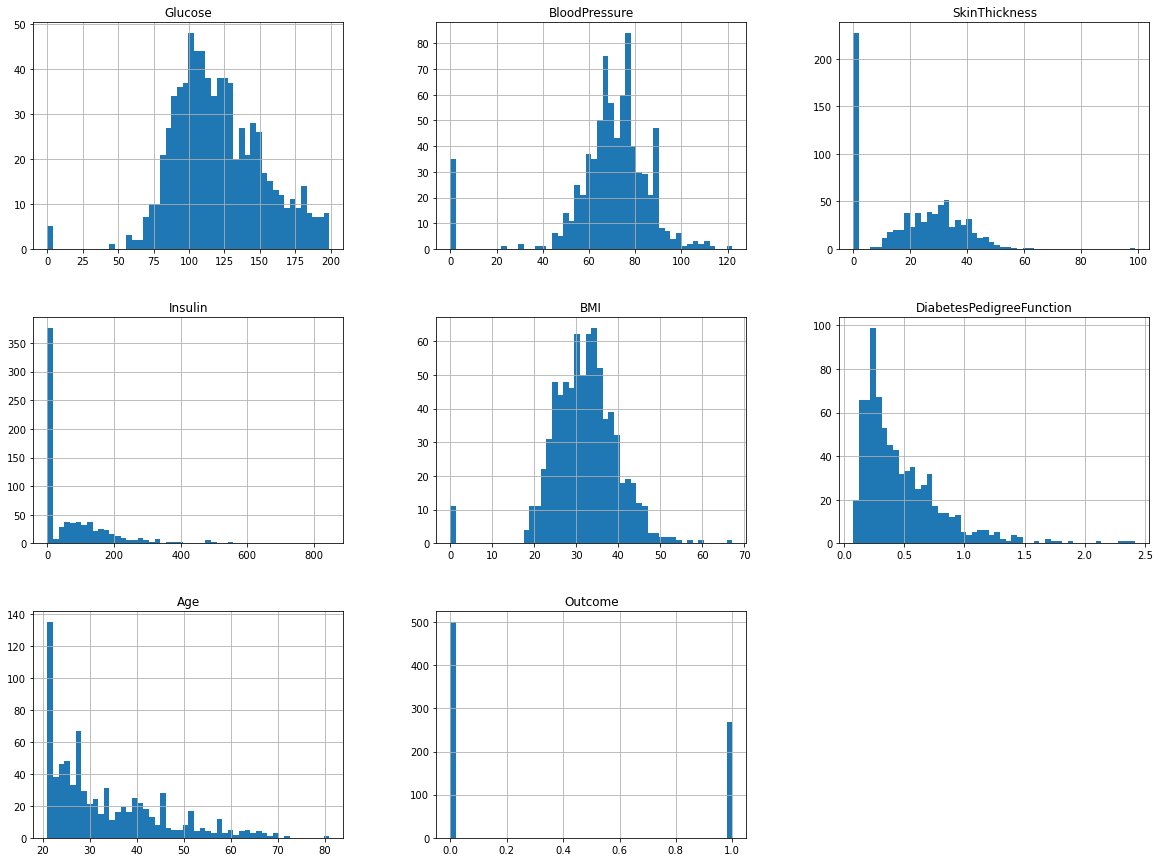

In [8]:
df.hist(bins=50,figsize=(20,15))

## 1 - By Using Raw_Data Model evaluation on different algorithm

## 1.1 ~ Logistic_Regression

In [9]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=19, stratify=y)
x_train.shape,x_test.shape

((537, 7), (231, 7))

In [10]:
logistic_model1_1 = LogisticRegression()
logistic_model1_1.fit(x_train,y_train)

LogisticRegression()

In [11]:
#Training data evaluation...

y_pred = logistic_model1_1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*60)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[137  13]
 [ 38  43]]
************************************************************
Accuracy : 0.7792207792207793
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.77      0.53      0.63        81

    accuracy                           0.78       231
   macro avg       0.78      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231



In [12]:
#Testing data evaluation...

y_pred = logistic_model1_1.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*60)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(y_train, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[310  40]
 [ 81 106]]
************************************************************
Accuracy : 0.7746741154562383
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       350
           1       0.73      0.57      0.64       187

    accuracy                           0.77       537
   macro avg       0.76      0.73      0.74       537
weighted avg       0.77      0.77      0.77       537



## 1.2 ~ KNN without Hyperparameter Tuning

In [13]:
knn_clf1_2 = KNeighborsClassifier()
knn_clf1_2.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
# Training Data Evaluation
y_pred_train = knn_clf1_2.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[309  41]
 [ 69 118]]
********************************************************************************
Accuracy is : 0.7951582867783985
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       350
           1       0.74      0.63      0.68       187

    accuracy                           0.80       537
   macro avg       0.78      0.76      0.77       537
weighted avg       0.79      0.80      0.79       537



In [15]:
# Testing Data Evaluation
y_pred = knn_clf1_2.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[124  26]
 [ 44  37]]
********************************************************************************
Accuracy is : 0.696969696969697
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       150
           1       0.59      0.46      0.51        81

    accuracy                           0.70       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.69      0.70      0.69       231



## 1.3 ~ KNN with Standardisation 

In [16]:
dfs = pd.read_csv('diabetes.csv')
xs = dfs.drop('Outcome',axis = 1)
ys = dfs['Outcome']

xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys,test_size=0.3, random_state=19, stratify=y)

In [17]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(xs_train)
xs_train = pd.DataFrame(array,columns=xs_train.columns)
xs_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.041875,-0.742413,-1.339744,-0.708225,-0.647834,-0.047499,-0.544994
1,0.584498,-0.195669,0.333079,0.433973,1.285279,-0.122344,-0.800446
2,-0.981434,-0.444189,-1.339744,-0.708225,-1.051586,-0.870801,-0.715295
3,-0.511655,-3.426430,-1.339744,-0.708225,-3.926785,-0.515284,-0.800446
4,-0.762204,-0.444189,0.140061,-0.708225,-0.476546,-0.084921,-0.970746


In [18]:
knn_clf1_3 = KNeighborsClassifier()
knn_clf1_3.fit(xs_train,ys_train)

KNeighborsClassifier()

In [19]:
# Training Data Evaluation
ys_pred_train = knn_clf1_3.predict(xs_train)

cnf_matrix = confusion_matrix(ys_train, ys_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_train, ys_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_train, ys_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[312  38]
 [ 64 123]]
********************************************************************************
Accuracy is : 0.8100558659217877
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       350
           1       0.76      0.66      0.71       187

    accuracy                           0.81       537
   macro avg       0.80      0.77      0.78       537
weighted avg       0.81      0.81      0.81       537



In [20]:
xs_test_new = pd.DataFrame(std_scaler.transform(xs_test))
xs_test_new

# Testing Data Evaluation
ys_pred = knn_clf1_3.predict(xs_test_new)

cnf_matrix = confusion_matrix(ys_test, ys_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_test, ys_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_test, ys_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[131  19]
 [ 36  45]]
********************************************************************************
Accuracy is : 0.7619047619047619
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



## 1.4 ~ KNN with Hyperparameter Tuning

In [21]:
knn_clf1_4 = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(2,30),
                  'p' :[1,2]}

gscv_knn_clf1_4 = GridSearchCV(knn_clf1_4,hyperparameters,cv=5)
gscv_knn_clf1_4.fit(x_train, y_train)
gscv_knn_clf1_4.best_estimator_

KNeighborsClassifier(n_neighbors=28, p=1)

In [22]:
# Training Data Evaluation
knn_clf1_4 = gscv_knn_clf1_4.best_estimator_
y_pred_train = knn_clf1_4.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[321  29]
 [106  81]]
********************************************************************************
Accuracy is : 0.7486033519553073
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.92      0.83       350
           1       0.74      0.43      0.55       187

    accuracy                           0.75       537
   macro avg       0.74      0.68      0.69       537
weighted avg       0.75      0.75      0.73       537



In [23]:
# Testing Data Evaluation
knn_clf1_4 = gscv_knn_clf1_4.best_estimator_

y_pred = knn_clf1_4.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[138  12]
 [ 48  33]]
********************************************************************************
Accuracy is : 0.7402597402597403
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       150
           1       0.73      0.41      0.52        81

    accuracy                           0.74       231
   macro avg       0.74      0.66      0.67       231
weighted avg       0.74      0.74      0.72       231



## 1.5 ~ KNN Standardisation + Hyperparameter Tuning

In [24]:
dfs = pd.read_csv('diabetes.csv')
xs = dfs.drop('Outcome',axis = 1)
ys = dfs['Outcome']

xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys,test_size=0.3, random_state=19, stratify=y)

In [25]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(xs_train)
xs_train = pd.DataFrame(array,columns=xs_train.columns)
xs_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.041875,-0.742413,-1.339744,-0.708225,-0.647834,-0.047499,-0.544994
1,0.584498,-0.195669,0.333079,0.433973,1.285279,-0.122344,-0.800446
2,-0.981434,-0.444189,-1.339744,-0.708225,-1.051586,-0.870801,-0.715295
3,-0.511655,-3.426430,-1.339744,-0.708225,-3.926785,-0.515284,-0.800446
4,-0.762204,-0.444189,0.140061,-0.708225,-0.476546,-0.084921,-0.970746


In [26]:
knn_clf1_5 = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(2,30),
                  'p' :[1,2]}

gscv_knn_clf1_5 = GridSearchCV(knn_clf1_5,hyperparameters,cv=5)
gscv_knn_clf1_5.fit(xs_train, ys_train)
gscv_knn_clf1_5.best_estimator_

KNeighborsClassifier(n_neighbors=27)

In [27]:
# Training Data Evaluation
knn_clf1_5 = gscv_knn_clf1_5.best_estimator_
ys_pred_train = knn_clf1_5.predict(xs_train)

cnf_matrix = confusion_matrix(ys_train, ys_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_train, ys_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_train, ys_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[323  27]
 [101  86]]
********************************************************************************
Accuracy is : 0.7616387337057728
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       350
           1       0.76      0.46      0.57       187

    accuracy                           0.76       537
   macro avg       0.76      0.69      0.70       537
weighted avg       0.76      0.76      0.74       537



In [28]:
# Testing Data Evaluation
xs_test_new = pd.DataFrame(std_scaler.transform(xs_test))
xs_test_new

knn_clf1_5 = gscv_knn_clf1_5.best_estimator_
ys_pred = knn_clf1_5.predict(xs_test_new)

cnf_matrix = confusion_matrix(ys_test, ys_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_test, ys_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_test, ys_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[136  14]
 [ 43  38]]
********************************************************************************
Accuracy is : 0.7532467532467533
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       150
           1       0.73      0.47      0.57        81

    accuracy                           0.75       231
   macro avg       0.75      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



## 1.6 ~ Decision_Tree without Hyperparameter Tuning

In [29]:
dt_clf1_6 = DecisionTreeClassifier()
dt_clf1_6.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
# Training
y_pred_train = dt_clf1_6.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[350   0]
 [  0 187]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [31]:
# Testing
y_pred = dt_clf1_6.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[117  33]
 [ 34  47]]
Accuracy : 0.70995670995671
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       150
           1       0.59      0.58      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



## 1.7 ~ Decision_Tree with Hyperparameter Tuning

In [32]:
dt_model1_7 = DecisionTreeClassifier()
hyperparameters ={ "criterion" :['gini','entropy'],
     'max_depth': np.arange(3,8),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}


gscv_dt_clf1_7 = GridSearchCV(dt_model1_7,hyperparameters, cv = 5)
gscv_dt_clf1_7.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [33]:
# Training Data Evaluation After Hyperparameter Tuning
dt_clf1_7 = gscv_dt_clf1_7.best_estimator_
dt_clf1_7.fit(x_train, y_train)

y_pred_train = dt_clf1_7.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[295  55]
 [ 63 124]]
********************************************************************************
Accuracy : 0.7802607076350093
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       350
           1       0.69      0.66      0.68       187

    accuracy                           0.78       537
   macro avg       0.76      0.75      0.76       537
weighted avg       0.78      0.78      0.78       537



In [34]:
## Testing Data Evaluation After Hyperparameter Tuning
y_pred = dt_clf1_7.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[126  24]
 [ 35  46]]
********************************************************************************
Accuracy : 0.7445887445887446
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       150
           1       0.66      0.57      0.61        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



## 1.8 ~ Decision_Tree with Hyperparameter Pruning

In [35]:
decision_tree_model1_8 = DecisionTreeClassifier(random_state=10)
decision_tree_model1_8.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [36]:
result = decision_tree_model1_8.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00155183, 0.00169291, 0.00172918, 0.00175874,
       0.00177755, 0.00179569, 0.00181564, 0.00182562, 0.00223464,
       0.00227107, 0.00235878, 0.00248293, 0.00248293, 0.00248293,
       0.00248293, 0.00251397, 0.00264846, 0.0027933 , 0.0027933 ,
       0.00282151, 0.00283763, 0.00289675, 0.00294848, 0.00295788,
       0.00311072, 0.00317868, 0.00319234, 0.00319234, 0.00338581,
       0.00358645, 0.00369681, 0.00390175, 0.0039646 , 0.00425645,
       0.00467937, 0.00474578, 0.00537108, 0.00560293, 0.00575409,
       0.00575573, 0.00616276, 0.00672072, 0.00680132, 0.00919386,
       0.0094677 , 0.00957231, 0.01328341, 0.01715841, 0.09352161])

In [37]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf1_8 = DecisionTreeClassifier(random_state=30,ccp_alpha=ccp_alpha)
    dt_clf1_8.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf1_8.score(x_train, y_train))
    test_accuracy_list.append(dt_clf1_8.score(x_test, y_test))

In [38]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([46, 47]),)

In [39]:
decision_tree_model1_8_1 = DecisionTreeClassifier(random_state=10,ccp_alpha=ccp_alpha_list[37])
decision_tree_model1_8_1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0053710783168536376, random_state=10)

In [40]:
# Training
y_pred_train = decision_tree_model1_8_1.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[323  27]
 [ 60 127]]
Accuracy : 0.8379888268156425
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       350
           1       0.82      0.68      0.74       187

    accuracy                           0.84       537
   macro avg       0.83      0.80      0.81       537
weighted avg       0.84      0.84      0.83       537



In [41]:
# Testing
y_pred = decision_tree_model1_8_1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[134  16]
 [ 46  35]]
Accuracy : 0.7316017316017316
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       150
           1       0.69      0.43      0.53        81

    accuracy                           0.73       231
   macro avg       0.72      0.66      0.67       231
weighted avg       0.72      0.73      0.71       231



## 1.9 ~ Random_forest without Hyperparameter Tuning

In [42]:
rf_model1_9 = RandomForestClassifier()
rf_model1_9.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
## Training Data Evaluation 

y_pred_train = rf_model1_9.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[350   0]
 [  0 187]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [44]:
## Testing Data Evaluation

y_pred = rf_model1_9.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[131  19]
 [ 36  45]]
********************************************************************************
Accuracy : 0.7619047619047619
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



## 1.10 ~ Random_forest with Hyperparameter Tuning

In [45]:
rf_model1_10 = RandomForestClassifier()

hyperparameters = {
                "n_estimators" :np.arange(10,200),
                "criterion" : ['gini','entropy'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(4,20), 
                "min_samples_leaf" : np.arange(3,10),
                "oob_score" : [True],
                "random_state" : [11]
                    }

gscv_rf_model1_10 = RandomizedSearchCV(rf_model1_10,hyperparameters,cv = 7)
gscv_rf_model1_10.fit(x_train, y_train)
gscv_rf_model1_10.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7,
                       min_samples_split=17, n_estimators=41, oob_score=True,
                       random_state=11)

In [46]:
rf_model1_10 = gscv_rf_model1_10.best_estimator_

rf_model1_10.fit(x_train, y_train )

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7,
                       min_samples_split=17, n_estimators=41, oob_score=True,
                       random_state=11)

In [47]:
## Training Data Evaluation 

y_pred_train = rf_model1_10.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[325  25]
 [ 86 101]]
********************************************************************************
Accuracy : 0.7932960893854749
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       350
           1       0.80      0.54      0.65       187

    accuracy                           0.79       537
   macro avg       0.80      0.73      0.75       537
weighted avg       0.79      0.79      0.78       537



In [48]:
## Testing Data Evaluation

y_pred = rf_model1_10.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[137  13]
 [ 42  39]]
********************************************************************************
Accuracy : 0.7619047619047619
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       150
           1       0.75      0.48      0.59        81

    accuracy                           0.76       231
   macro avg       0.76      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231



## 2 -  By Using Sampling ( SMOTE ) Model evaluation on different algorithm

## 2.1 ~ Logistic_Regression

In [49]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']
smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=19, stratify=y)
x_train.shape,x_test.shape

((700, 7), (300, 7))

In [50]:
logistic_model2_1 = LogisticRegression()
logistic_model2_1.fit(x_train,y_train)

LogisticRegression()

In [51]:
#Training data evaluation...

y_pred = logistic_model2_1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*60)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[116  34]
 [ 43 107]]
************************************************************
Accuracy : 0.7433333333333333
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       150
           1       0.76      0.71      0.74       150

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [52]:
#Testing data evaluation...

y_pred = logistic_model2_1.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*60)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(y_train, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[272  78]
 [ 95 255]]
************************************************************
Accuracy : 0.7528571428571429
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       350
           1       0.77      0.73      0.75       350

    accuracy                           0.75       700
   macro avg       0.75      0.75      0.75       700
weighted avg       0.75      0.75      0.75       700



## 2.2 ~ KNN without Hyperparameter Tuning

In [53]:
knn_clf2_2 = KNeighborsClassifier()
knn_clf2_2.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
# Training Data Evaluation
y_pred_train = knn_clf2_2.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[257  93]
 [ 40 310]]
********************************************************************************
Accuracy is : 0.81
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.73      0.79       350
           1       0.77      0.89      0.82       350

    accuracy                           0.81       700
   macro avg       0.82      0.81      0.81       700
weighted avg       0.82      0.81      0.81       700



In [55]:
# Testing Data Evaluation
y_pred = knn_clf2_2.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[108  42]
 [ 29 121]]
********************************************************************************
Accuracy is : 0.7633333333333333
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.72      0.75       150
           1       0.74      0.81      0.77       150

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



## 2.3 ~ KNN with Standardisation

In [56]:
dfs2_3 = pd.read_csv('diabetes.csv')
xs = dfs2_3.drop('Outcome',axis = 1)
ys = dfs2_3['Outcome']
smt = SMOTE()
xs,ys = smt.fit_resample(xs,ys)
xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys,test_size=0.30, random_state=19, stratify=y)

In [57]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(xs_train)
xs_train = pd.DataFrame(array,columns=xs_train.columns)
xs_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.493984,-0.466885,0.753367,0.882854,-0.528734,0.616070,2.382650
1,-0.914898,0.431794,1.135049,-0.728613,0.564045,-0.772725,0.526335
2,-1.190549,-0.566739,-0.328065,-0.287580,-0.027341,-0.995427,-0.799605
3,-1.006781,0.032381,0.626140,-0.728613,-0.323034,-0.534558,-0.976397
4,0.800262,0.132234,-1.345883,-0.728613,0.423022,0.039483,-0.004041


In [58]:
xs_train.shape

(700, 7)

In [59]:
xs_test.shape

(300, 7)

In [60]:
knn_clf2_3 = KNeighborsClassifier()
knn_clf2_3.fit(xs_train,ys_train)

KNeighborsClassifier()

In [61]:
# Training Data Evaluation
ys_pred_train = knn_clf2_3.predict(xs_train)

cnf_matrix = confusion_matrix(ys_train, ys_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_train, ys_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_train, ys_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[276  74]
 [ 37 313]]
********************************************************************************
Accuracy is : 0.8414285714285714
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       350
           1       0.81      0.89      0.85       350

    accuracy                           0.84       700
   macro avg       0.85      0.84      0.84       700
weighted avg       0.85      0.84      0.84       700



In [62]:
xs_test_new = pd.DataFrame(std_scaler.transform(xs_test))
xs_test_new

# Testing Data Evaluation
ys_pred = knn_clf2_3.predict(xs_test_new)

cnf_matrix = confusion_matrix(ys_test, ys_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_test, ys_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_test, ys_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[111  39]
 [ 23 127]]
********************************************************************************
Accuracy is : 0.7933333333333333
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       150
           1       0.77      0.85      0.80       150

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



## 2.4 ~ KNN with Hyperparameter Tuning

In [63]:
knn_clf2_4 = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(2,30),
                  'p' :[1,2]}

gscv_knn_clf2_4 = GridSearchCV(knn_clf2_4,hyperparameters,cv=5)
gscv_knn_clf2_4.fit(x_train, y_train)
gscv_knn_clf2_4.best_estimator_

KNeighborsClassifier(n_neighbors=3, p=1)

In [64]:
# Training Data Evaluation
knn_clf2_4 = gscv_knn_clf2_4.best_estimator_
y_pred_train = knn_clf2_4.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[294  56]
 [ 25 325]]
********************************************************************************
Accuracy is : 0.8842857142857142
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       350
           1       0.85      0.93      0.89       350

    accuracy                           0.88       700
   macro avg       0.89      0.88      0.88       700
weighted avg       0.89      0.88      0.88       700



In [65]:
# Testing Data Evaluation
knn_clf2_4 = gscv_knn_clf2_4.best_estimator_

y_pred = knn_clf2_4.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[110  40]
 [ 25 125]]
********************************************************************************
Accuracy is : 0.7833333333333333
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       150
           1       0.76      0.83      0.79       150

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



## 2.5 ~ KNN Standardization + Hyperparameter Tuning

In [66]:
dfs2_5 = pd.read_csv('diabetes.csv')
xs = dfs2_5.drop('Outcome',axis = 1)
ys = dfs2_5['Outcome']
smt = SMOTE()
xs,ys = smt.fit_resample(xs,ys)
xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys,test_size=0.30, random_state=19, stratify=y)

In [67]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(xs_train)
xs_train = pd.DataFrame(array,columns=xs_train.columns)
xs_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.526443,-0.491776,0.731788,0.892909,-0.531413,0.599805,2.408434
1,-0.882891,0.427704,1.111515,-0.739937,0.589171,-0.787177,0.538374
2,-1.158631,-0.593940,-0.344105,-0.293053,-0.017263,-1.009588,-0.797383
3,-0.974804,0.019046,0.605213,-0.739937,-0.320480,-0.549320,-0.975484
4,1.139198,0.836362,-1.356710,-0.739937,-0.320480,-0.825487,1.161727


In [68]:
knn_clf2_5 = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(2,30),
                  'p' :[1,2]}

gscv_knn_clf2_5 = GridSearchCV(knn_clf2_5,hyperparameters,cv=5)
gscv_knn_clf2_5.fit(xs_train, ys_train)
gscv_knn_clf2_5.best_estimator_

KNeighborsClassifier(n_neighbors=29, p=1)

In [69]:
# Training Data Evaluation
knn_clf2_5 = gscv_knn_clf2_5.best_estimator_
ys_pred_train = knn_clf2_5.predict(xs_train)

cnf_matrix = confusion_matrix(ys_train, ys_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_train, ys_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_train, ys_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[239 111]
 [ 44 306]]
********************************************************************************
Accuracy is : 0.7785714285714286
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.68      0.76       350
           1       0.73      0.87      0.80       350

    accuracy                           0.78       700
   macro avg       0.79      0.78      0.78       700
weighted avg       0.79      0.78      0.78       700



In [70]:
# Testing Data Evaluation
xs_test_new = pd.DataFrame(std_scaler.transform(xs_test))
xs_test_new

knn_clf2_5 = gscv_knn_clf2_5.best_estimator_
ys_pred = knn_clf2_5.predict(xs_test_new)

cnf_matrix = confusion_matrix(ys_test, ys_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_test, ys_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_test, ys_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[109  41]
 [ 24 126]]
********************************************************************************
Accuracy is : 0.7833333333333333
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       150
           1       0.75      0.84      0.79       150

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



## 2.6 ~ Decision_Tree without Hyperparameter Tuning

In [71]:
dt_clf2_6 = DecisionTreeClassifier()
dt_clf2_6.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
# Training
y_pred_train = dt_clf2_6.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[350   0]
 [  0 350]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [73]:
# Testing
y_pred = dt_clf2_6.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[115  35]
 [ 39 111]]
Accuracy : 0.7533333333333333
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       150
           1       0.76      0.74      0.75       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



## 2.7 ~ Decision_Tree with Hyperparameter Tuning

In [74]:
dt_model2_7 = DecisionTreeClassifier()
hyperparameters ={ "criterion" :['gini','entropy'],
     'max_depth': np.arange(3,8),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}


gscv_dt_clf2_7 = GridSearchCV(dt_model2_7,hyperparameters, cv = 5)
gscv_dt_clf2_7.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [75]:
# Training Data Evaluation After Hyperparameter Tuning
dt_clf2_7 = gscv_dt_clf2_7.best_estimator_
dt_clf2_7.fit(x_train, y_train)

y_pred_train = dt_clf2_7.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[281  69]
 [ 42 308]]
********************************************************************************
Accuracy : 0.8414285714285714
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.80      0.84       350
           1       0.82      0.88      0.85       350

    accuracy                           0.84       700
   macro avg       0.84      0.84      0.84       700
weighted avg       0.84      0.84      0.84       700



In [76]:
## Testing Data Evaluation After Hyperparameter Tuning
y_pred = dt_clf2_7.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 99  51]
 [ 42 108]]
********************************************************************************
Accuracy : 0.69
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.66      0.68       150
           1       0.68      0.72      0.70       150

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



## 2.8 ~ Decision_Tree with Hyperparameter Pruning

In [77]:
decision_tree_model2_8 = DecisionTreeClassifier(random_state=19)
decision_tree_model2_8.fit(x_train, y_train)

DecisionTreeClassifier(random_state=19)

In [78]:
result = decision_tree_model2_8.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00092352, 0.00109804, 0.00128571, 0.00134454,
       0.00136646, 0.00138095, 0.00138889, 0.00142857, 0.00155874,
       0.00166837, 0.00171429, 0.00173913, 0.00178571, 0.00179592,
       0.00190476, 0.00190476, 0.00190476, 0.00190476, 0.00204082,
       0.0021039 , 0.00214286, 0.00214286, 0.00214286, 0.00225903,
       0.00226448, 0.00228571, 0.00228571, 0.00247619, 0.00251837,
       0.00253968, 0.00254966, 0.00257076, 0.00258372, 0.0025907 ,
       0.00261905, 0.00285714, 0.0029932 , 0.00323676, 0.00332487,
       0.00341174, 0.00350947, 0.0035322 , 0.00357143, 0.00363026,
       0.00367337, 0.00367347, 0.00367891, 0.00368906, 0.00377218,
       0.00402857, 0.00419048, 0.00429098, 0.00547485, 0.00564935,
       0.00669772, 0.00731449, 0.00751839, 0.00758427, 0.01016336,
       0.01152569, 0.01287911, 0.01461398, 0.0185972 , 0.0324369 ,
       0.09083972])

In [79]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf2_8 = DecisionTreeClassifier(random_state=30,ccp_alpha=ccp_alpha)
    dt_clf2_8.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf2_8.score(x_train, y_train))
    test_accuracy_list.append(dt_clf2_8.score(x_test, y_test))

In [80]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([44, 45, 50]),)

In [81]:
decision_tree_model2_8_1 = DecisionTreeClassifier(random_state=19,ccp_alpha=ccp_alpha_list[59])
decision_tree_model2_8_1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.010163358070500936, random_state=19)

In [82]:
# Training
y_pred_train = decision_tree_model2_8_1.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[267  83]
 [ 67 283]]
Accuracy : 0.7857142857142857
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       350
           1       0.77      0.81      0.79       350

    accuracy                           0.79       700
   macro avg       0.79      0.79      0.79       700
weighted avg       0.79      0.79      0.79       700



In [83]:
# Testing
y_pred = decision_tree_model2_8_1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[117  33]
 [ 31 119]]
Accuracy : 0.7866666666666666
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       150
           1       0.78      0.79      0.79       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



## 2.9 ~ Random_forest without Hyperparameter Tuning

In [84]:
rf_model2_9 = RandomForestClassifier()
rf_model2_9.fit(x_train, y_train)

RandomForestClassifier()

In [85]:
## Training Data Evaluation 

y_pred_train = rf_model2_9.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[350   0]
 [  0 350]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [86]:
## Testing Data Evaluation

y_pred = rf_model2_9.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[124  26]
 [ 25 125]]
********************************************************************************
Accuracy : 0.83
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.83      0.83      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## 2.10 ~ Random_forest with Hyperparameter Tuning

In [87]:
rf_model2_10 = RandomForestClassifier()

hyperparameters = {
                "n_estimators" :np.arange(10,200),
                "criterion" : ['gini','entropy'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(4,20), 
                "min_samples_leaf" : np.arange(3,10),
                "oob_score" : [True],
                "random_state" : [11]
                    }

gscv_rf_model2_10 = RandomizedSearchCV(rf_model2_10,hyperparameters,cv = 7)
gscv_rf_model2_10.fit(x_train, y_train)
gscv_rf_model2_10.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=17, n_estimators=103, oob_score=True,
                       random_state=11)

In [88]:
rf_model2_10 = gscv_rf_model2_10.best_estimator_

rf_model2_10.fit(x_train, y_train )

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=17, n_estimators=103, oob_score=True,
                       random_state=11)

In [89]:
## Training Data Evaluation 

y_pred_train = rf_model2_10.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[286  64]
 [ 35 315]]
********************************************************************************
Accuracy : 0.8585714285714285
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       350
           1       0.83      0.90      0.86       350

    accuracy                           0.86       700
   macro avg       0.86      0.86      0.86       700
weighted avg       0.86      0.86      0.86       700



In [90]:
## Testing Data Evaluation

y_pred = rf_model2_10.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[124  26]
 [ 24 126]]
********************************************************************************
Accuracy : 0.8333333333333334
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       150
           1       0.83      0.84      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## 3 - By Imputing Outliers ( detect = IQR method , imputation = KNN ) 

## 3.1 ~ Logistic_Regression

In [91]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=19, stratify=y)
x_train.shape,x_test.shape

((537, 7), (231, 7))

<AxesSubplot:xlabel='Glucose'>

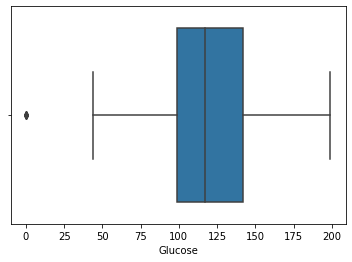

In [92]:
sns.boxplot(x=df['Glucose'])

<AxesSubplot:>

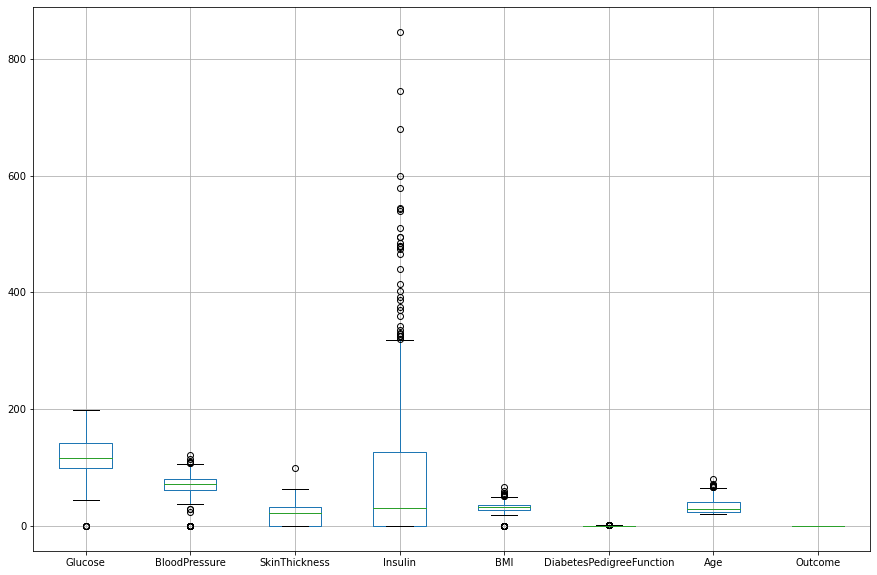

In [93]:
plt.figure(figsize=(15,10))
df.boxplot()

<AxesSubplot:>

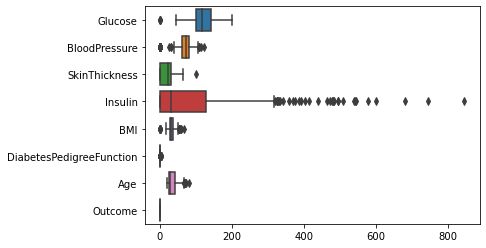

In [94]:
sns.boxplot(data=df,orient='h')

In [95]:
q1 = df['Glucose'].quantile(0.25)
q2 = df['Glucose'].quantile(0.50)
q3 = df['Glucose'].quantile(0.75)
median =  df['Glucose'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail =",upper_tail)
print("Lower Tail =",lower_tail)

Q1 : 99.0
Q2 : 117.0
Q3 : 142.0
median : 117.0
Upper Tail = 206.5
Lower Tail = 34.5


In [96]:
df[(df['Glucose'] > upper_tail) | (df['Glucose'] < lower_tail)]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
502,0,68,41,0,39.0,0.727,41,1


In [97]:
df[(df['Glucose'] > upper_tail) | (df['Glucose'] < lower_tail)].head(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.14,22,0


In [98]:
#df['Glucose'][(df['Glucose'] > upper_tail) | (df['Glucose'] < lower_tail)]=df['Glucose'].median()
df.loc[(df['Glucose'] > upper_tail) | (df['Glucose'] < lower_tail),'Glucose'] = np.nan

In [99]:
df['Glucose'][75]

nan

In [100]:
df.iloc[75:76]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,NaN,48,20,0,24.7,0.14,22,0


In [101]:
q1 = df['BloodPressure'].quantile(0.25)
q2 = df['BloodPressure'].quantile(0.50)
q3 = df['BloodPressure'].quantile(0.75)
median =  df['BloodPressure'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail =",upper_tail)
print("Lower Tail =",lower_tail)


Q1 : 62.0
Q2 : 72.0
Q3 : 80.0
median : 72.0
Upper Tail = 107.0
Lower Tail = 35.0


In [102]:
df[['BloodPressure']].loc[df['BloodPressure'] < lower_tail].shape

(38, 1)

In [103]:
df[['BloodPressure']].loc[df['BloodPressure'] < lower_tail].head(1)

,BloodPressure
7,0


In [104]:
df.loc[(df['BloodPressure'] > upper_tail) | (df['BloodPressure'] < lower_tail),'BloodPressure'] = np.nan
#df.loc[(df['Glucose'] > upper_tail) | (df['Glucose'] < lower_tail),'Glucose'] = np.nan

In [105]:
df.iloc[7:8]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,150.0,NaN,0,0,35.3,0.134,29,0


In [106]:
q1 = df['SkinThickness'].quantile(0.25)
q2 = df['SkinThickness'].quantile(0.50)
q3 = df['SkinThickness'].quantile(0.75)
median =  df['SkinThickness'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail =",upper_tail)
print("Lower Tail =",lower_tail)

Q1 : 0.0
Q2 : 23.0
Q3 : 32.0
median : 23.0
Upper Tail = 80.0
Lower Tail = -48.0


In [107]:
df[(df['SkinThickness'] > upper_tail) | (df['SkinThickness'] < lower_tail)].shape

(1, 8)

In [108]:
df[(df['SkinThickness'] > upper_tail) | (df['SkinThickness'] < lower_tail)]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,197.0,70.0,99,0,34.7,0.575,62,1


In [109]:
df.loc[(df['SkinThickness'] > upper_tail) | (df['SkinThickness'] < lower_tail),'SkinThickness'] = np.nan

In [110]:
df.loc[579:580]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,197.0,70.0,NaN,0,34.7,0.575,62,1
580,151.0,90.0,46.0,0,42.1,0.371,21,1


In [111]:
q1 = df['Insulin'].quantile(0.25)
q2 = df['Insulin'].quantile(0.50)
q3 = df['Insulin'].quantile(0.75)
median =  df['Insulin'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail =",upper_tail)
print("Lower Tail =",lower_tail)

Q1 : 0.0
Q2 : 30.5
Q3 : 127.25
median : 30.5
Upper Tail = 318.125
Lower Tail = -190.875


In [112]:
df[(df['Insulin'] > upper_tail) | (df['Insulin'] < lower_tail)].shape

(34, 8)

In [113]:
df[(df['Insulin'] > upper_tail) | (df['Insulin'] < lower_tail)].head(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,150.0,70.0,45.0,543,30.5,0.158,35,1


In [114]:
df.loc[(df['Insulin'] > upper_tail) | (df['Insulin'] < lower_tail),'Insulin'] = np.nan

In [115]:
df.loc[8:9]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,150.0,70.0,45.0,NaN,30.5,0.158,35,1
9,150.0,96.0,0.0,0.0,0.0,0.232,54,1


In [116]:
q1 = df['BMI'].quantile(0.25)
q2 = df['BMI'].quantile(0.50)
q3 = df['BMI'].quantile(0.75)
median =  df['BMI'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail =",upper_tail)
print("Lower Tail =",lower_tail)

Q1 : 27.3
Q2 : 32.0
Q3 : 36.6
median : 32.0
Upper Tail = 50.550000000000004
Lower Tail = 13.35


In [117]:
df[(df['BMI'] > upper_tail) | (df['BMI'] < lower_tail)].shape

(19, 8)

In [118]:
df[(df['BMI'] > upper_tail) | (df['BMI'] < lower_tail)].head(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,150.0,96.0,0.0,0.0,0.0,0.232,54,1


In [119]:
df.loc[(df['BMI'] > upper_tail) | (df['BMI'] < lower_tail),'BMI'] = np.nan

In [120]:
df.loc[8:9]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,150.0,70.0,45.0,NaN,30.5,0.158,35,1
9,150.0,96.0,0.0,0.0,NaN,0.232,54,1


In [121]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q2 = df['DiabetesPedigreeFunction'].quantile(0.50)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
median =  df['DiabetesPedigreeFunction'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail =",upper_tail)
print("Lower Tail =",lower_tail)

Q1 : 0.24375
Q2 : 0.3725
Q3 : 0.62625
median : 0.3725
Upper Tail = 1.2
Lower Tail = -0.32999999999999996


In [122]:
df[(df['DiabetesPedigreeFunction'] > upper_tail) | (df['DiabetesPedigreeFunction'] < lower_tail)].shape

(29, 8)

In [123]:
df[(df['DiabetesPedigreeFunction'] > upper_tail) | (df['DiabetesPedigreeFunction'] < lower_tail)].head(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,150.0,40.0,35.0,168.0,43.1,2.288,33,1


In [124]:
df.loc[(df['DiabetesPedigreeFunction'] > upper_tail) | (df['DiabetesPedigreeFunction'] < lower_tail),'DiabetesPedigreeFunction'] = np.nan

In [125]:
df.loc[4:5]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,150.0,40.0,35.0,168.0,43.1,NaN,33,1
5,150.0,74.0,0.0,0.0,25.6,0.201,30,0


In [126]:
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.50)
q3 = df['Age'].quantile(0.75)
median =  df['Age'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail =",upper_tail)
print("Lower Tail =",lower_tail)

Q1 : 24.0
Q2 : 29.0
Q3 : 41.0
median : 29.0
Upper Tail = 66.5
Lower Tail = -1.5


In [127]:
df[(df['Age'] > upper_tail) | (df['Age'] < lower_tail)].shape

(9, 8)

In [128]:
df[(df['Age'] > upper_tail) | (df['Age'] < lower_tail)].head(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,132.0,80.0,0.0,0.0,26.8,0.186,69,0


In [129]:
df.loc[(df['Age'] > upper_tail) | (df['Age'] < lower_tail),'Age'] = np.nan

In [130]:
df.loc[123:124]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,132.0,80.0,0.0,0.0,26.8,0.186,NaN,0
124,113.0,76.0,0.0,0.0,33.3,0.278,23.0,1


In [131]:
knn_imputer = KNNImputer(n_neighbors=5)
array = knn_imputer.fit_transform(df)
diabetes_df = pd.DataFrame(array,columns=df.columns)
diabetes_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,50.0,35.0,0.0,33.6,0.6270,50.0,1.0
1,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0.0
2,183.0,64.0,0.0,0.0,23.3,0.6720,52.0,1.0
3,150.0,66.0,23.0,94.0,28.1,0.1670,21.0,0.0
4,150.0,40.0,35.0,168.0,43.1,0.5688,33.0,1.0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.1710,63.0,0.0
764,122.0,70.0,27.0,0.0,36.8,0.3400,27.0,0.0
765,121.0,72.0,23.0,112.0,26.2,0.2450,30.0,0.0
766,126.0,60.0,0.0,0.0,30.1,0.3490,47.0,1.0


<AxesSubplot:>

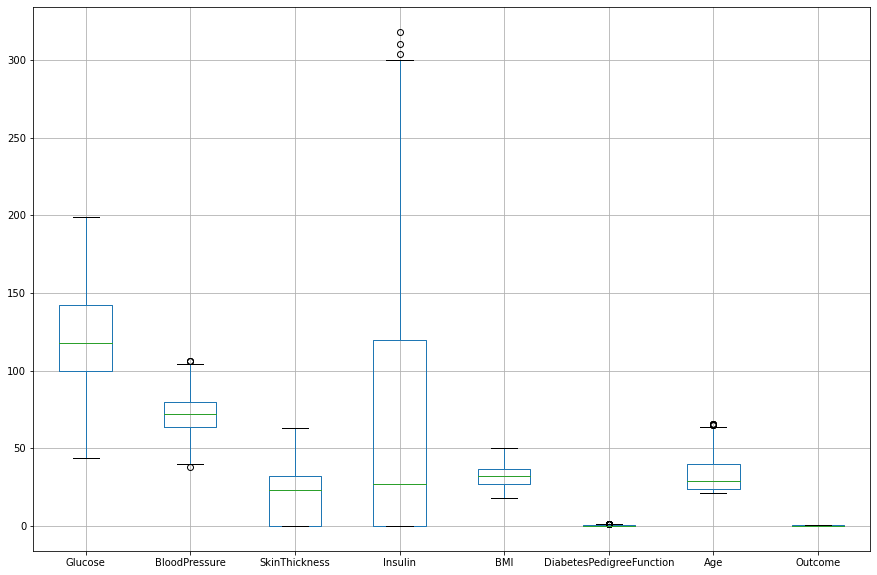

In [132]:
plt.figure(figsize=(15,10))
diabetes_df.boxplot()

In [133]:
diabetes_df.iloc[70:80]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
70,100.0,66.0,20.0,90.0,32.9,0.867,28.0,1.0
71,139.0,64.0,35.0,140.0,28.6,0.411,26.0,0.0
72,126.0,90.0,0.0,0.0,43.4,0.583,42.0,1.0
73,129.0,86.0,20.0,270.0,35.1,0.231,23.0,0.0
74,79.0,75.0,30.0,0.0,32.0,0.396,22.0,0.0
75,114.6,48.0,20.0,0.0,24.7,0.140,22.0,0.0
76,62.0,78.0,0.0,0.0,32.6,0.391,41.0,0.0
77,95.0,72.0,33.0,0.0,37.7,0.370,27.0,0.0
78,131.0,80.8,0.0,0.0,43.2,0.270,26.0,1.0
79,112.0,66.0,22.0,0.0,25.0,0.307,24.0,0.0


array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>, <AxesSubplot:>]],
      dtype=object)

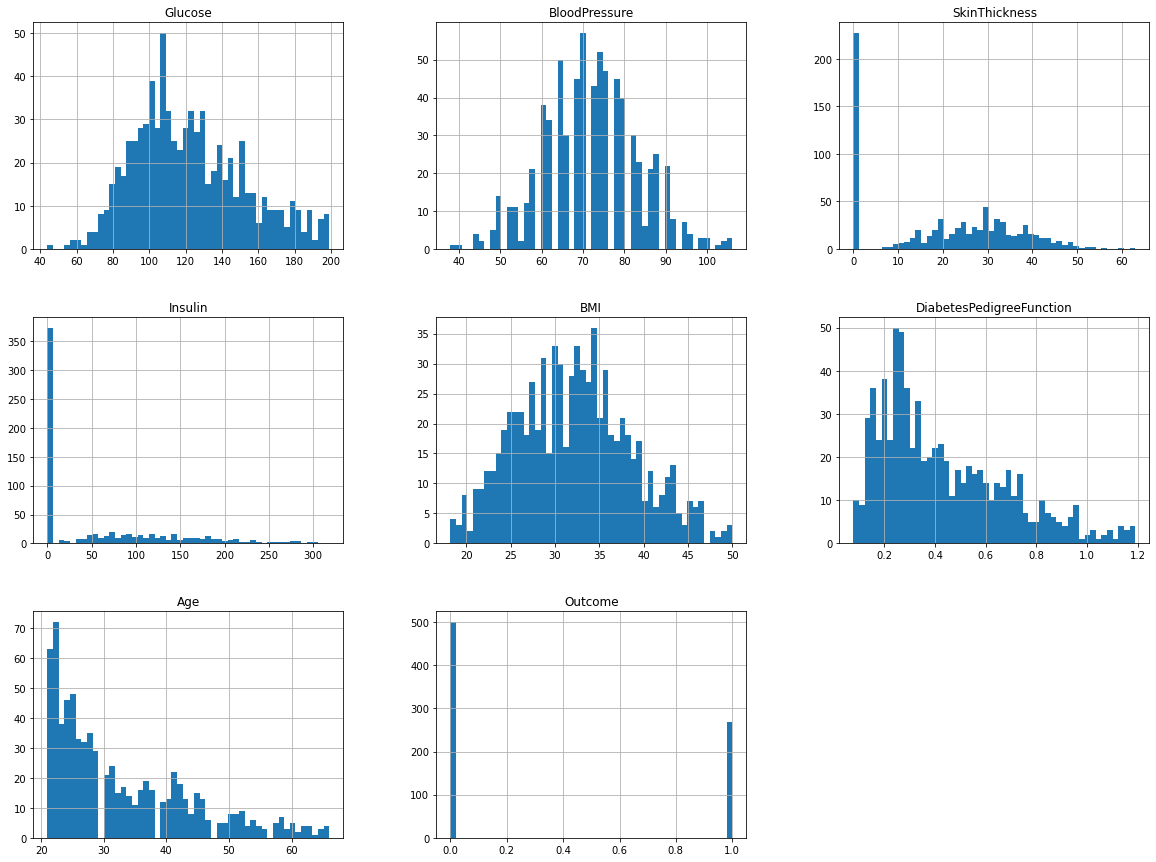

In [134]:
df.hist(bins=50,figsize=(20,15))

In [135]:
x = diabetes_df.drop('Outcome',axis = 1)
y = diabetes_df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=19, stratify=y)
x_train.shape,x_test.shape

((537, 7), (231, 7))

In [136]:
logistic_model3_1 = LogisticRegression()
logistic_model3_1.fit(x_train,y_train)

LogisticRegression()

In [137]:
#Training data evaluation...

y_pred = logistic_model3_1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*60)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[133  17]
 [ 38  43]]
************************************************************
Accuracy : 0.7619047619047619
************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       150
         1.0       0.72      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



In [138]:
#Testing data evaluation...

y_pred = logistic_model3_1.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*60)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(y_train, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[313  37]
 [ 82 105]]
************************************************************
Accuracy : 0.7783985102420856
************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       350
         1.0       0.74      0.56      0.64       187

    accuracy                           0.78       537
   macro avg       0.77      0.73      0.74       537
weighted avg       0.77      0.78      0.77       537



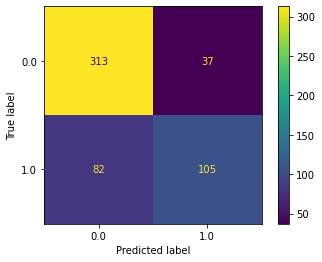

In [139]:
plot_confusion_matrix(logistic_model3_1,x_train, y_train)

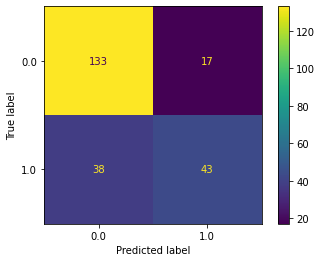

In [140]:
plot_confusion_matrix(logistic_model3_1,x_test, y_test)

## 3.2 ~ KNN without Hyperparameter Tuning

In [141]:
knn_clf3_2 = KNeighborsClassifier()
knn_clf3_2.fit(x_train,y_train)

KNeighborsClassifier()

In [142]:
# Training Data Evaluation
y_pred_train = knn_clf3_2.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[310  40]
 [ 67 120]]
********************************************************************************
Accuracy is : 0.8007448789571695
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       350
         1.0       0.75      0.64      0.69       187

    accuracy                           0.80       537
   macro avg       0.79      0.76      0.77       537
weighted avg       0.80      0.80      0.80       537



In [143]:
# Testing Data Evaluation
y_pred = knn_clf3_2.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[125  25]
 [ 37  44]]
********************************************************************************
Accuracy is : 0.7316017316017316
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       150
         1.0       0.64      0.54      0.59        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.73       231



## 3.3 ~ KNN with Standardisation  

In [144]:
dfs = pd.read_csv('diabetes.csv')
xs = dfs.drop('Outcome',axis = 1)
ys = dfs['Outcome']

xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys,test_size=0.3, random_state=19, stratify=y)

In [145]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(xs_train)
xs_train = pd.DataFrame(array,columns=xs_train.columns)
xs_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.041875,-0.742413,-1.339744,-0.708225,-0.647834,-0.047499,-0.544994
1,0.584498,-0.195669,0.333079,0.433973,1.285279,-0.122344,-0.800446
2,-0.981434,-0.444189,-1.339744,-0.708225,-1.051586,-0.870801,-0.715295
3,-0.511655,-3.426430,-1.339744,-0.708225,-3.926785,-0.515284,-0.800446
4,-0.762204,-0.444189,0.140061,-0.708225,-0.476546,-0.084921,-0.970746


In [146]:
knn_clf3_3 = KNeighborsClassifier()
knn_clf3_3.fit(xs_train,ys_train)

KNeighborsClassifier()

In [147]:
# Training Data Evaluation
ys_pred_train = knn_clf3_3.predict(xs_train)

cnf_matrix = confusion_matrix(ys_train, ys_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_train, ys_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_train, ys_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[312  38]
 [ 64 123]]
********************************************************************************
Accuracy is : 0.8100558659217877
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       350
           1       0.76      0.66      0.71       187

    accuracy                           0.81       537
   macro avg       0.80      0.77      0.78       537
weighted avg       0.81      0.81      0.81       537



In [148]:
xs_test_new = pd.DataFrame(std_scaler.transform(xs_test))
xs_test_new

# Testing Data Evaluation
ys_pred = knn_clf3_3.predict(xs_test_new)

cnf_matrix = confusion_matrix(ys_test, ys_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_test, ys_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_test, ys_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[131  19]
 [ 36  45]]
********************************************************************************
Accuracy is : 0.7619047619047619
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       150
           1       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



## 3.4 ~ KNN with Hyperparameter Tuning

In [149]:
knn_clf3_4 = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(2,30),
                  'p' :[1,2]}

gscv_knn_clf3_4 = GridSearchCV(knn_clf3_4,hyperparameters,cv=5)
gscv_knn_clf3_4.fit(x_train, y_train)
gscv_knn_clf3_4.best_estimator_

KNeighborsClassifier(n_neighbors=19, p=1)

In [150]:
# Training Data Evaluation
knn_clf3_4 = gscv_knn_clf3_4.best_estimator_
y_pred_train = knn_clf3_4.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[306  44]
 [ 84 103]]
********************************************************************************
Accuracy is : 0.7616387337057728
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.83       350
         1.0       0.70      0.55      0.62       187

    accuracy                           0.76       537
   macro avg       0.74      0.71      0.72       537
weighted avg       0.76      0.76      0.75       537



In [151]:
# Testing Data Evaluation
knn_clf3_4 = gscv_knn_clf3_4.best_estimator_

y_pred = knn_clf3_4.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[129  21]
 [ 42  39]]
********************************************************************************
Accuracy is : 0.7272727272727273
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       150
         1.0       0.65      0.48      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



## 3.5 ~ KNN Standardization + Hyperparameter Tuning

In [152]:
dfs = pd.read_csv('diabetes.csv')
xs = dfs.drop('Outcome',axis = 1)
ys = dfs['Outcome']

xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys,test_size=0.25, random_state=24, stratify=y)

In [153]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(xs_train)
xs_train = pd.DataFrame(array,columns=xs_train.columns)
xs_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.488136,-0.867845,-0.661204,-0.390921,-0.523694,-0.620371,-0.964641
1,1.087678,0.470794,0.602201,0.155464,-0.125097,-0.931891,1.026565
2,-0.039241,0.985656,1.297075,0.753073,1.726449,0.085740,-0.618344
3,0.475922,-0.764873,-1.292907,-0.698263,-0.665132,0.619774,2.498326
4,0.508120,0.058905,-1.292907,-0.698263,-0.086523,2.088366,-0.964641


In [154]:
knn_clf3_5 = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(2,30),
                  'p' :[1,2]}

gscv_knn_clf3_5 = GridSearchCV(knn_clf3_5,hyperparameters,cv=5)
gscv_knn_clf3_5.fit(xs_train, ys_train)
gscv_knn_clf3_5.best_estimator_

KNeighborsClassifier(n_neighbors=17)

In [155]:
# Training Data Evaluation
knn_clf3_5 = gscv_knn_clf3_5.best_estimator_
ys_pred_train = knn_clf3_5.predict(xs_train)

cnf_matrix = confusion_matrix(ys_train, ys_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_train, ys_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_train, ys_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[341  34]
 [ 87 114]]
********************************************************************************
Accuracy is : 0.7899305555555556
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       375
           1       0.77      0.57      0.65       201

    accuracy                           0.79       576
   macro avg       0.78      0.74      0.75       576
weighted avg       0.79      0.79      0.78       576



In [156]:
# Testing Data Evaluation
xs_test_new = pd.DataFrame(std_scaler.transform(xs_test))
xs_test_new

knn_clf3_5 = gscv_knn_clf3_5.best_estimator_
ys_pred = knn_clf3_5.predict(xs_test_new)

cnf_matrix = confusion_matrix(ys_test, ys_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(ys_test, ys_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(ys_test, ys_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[105  20]
 [ 30  37]]
********************************************************************************
Accuracy is : 0.7395833333333334
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       125
           1       0.65      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.74      0.73       192



## 3.6 ~ Decision_Tree without Hyperparameter Tuning

In [157]:
dt_clf3_6 = DecisionTreeClassifier()
dt_clf3_6.fit(x_train, y_train)

DecisionTreeClassifier()

In [158]:
# Training
y_pred_train = dt_clf3_6.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[350   0]
 [  0 187]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       350
         1.0       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [159]:
# Testing
y_pred = dt_clf3_6.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[119  31]
 [ 39  42]]
Accuracy : 0.696969696969697
Classification Report :
               precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       150
         1.0       0.58      0.52      0.55        81

    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.70      0.69       231



## 3.7 ~ Decision_Tree with Hyperparameter Tuning

In [160]:
dt_model3_7 = DecisionTreeClassifier()
hyperparameters ={ "criterion" :['gini','entropy'],
     'max_depth': np.arange(3,8),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}


gscv_dt_clf3_7 = GridSearchCV(dt_model3_7,hyperparameters, cv = 5)
gscv_dt_clf3_7.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [161]:
# Training Data Evaluation After Hyperparameter Tuning
dt_clf3_7 = gscv_dt_clf3_7.best_estimator_
dt_clf3_7.fit(x_train, y_train)

y_pred_train = dt_clf3_7.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[328  22]
 [ 67 120]]
********************************************************************************
Accuracy : 0.8342644320297952
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       350
         1.0       0.85      0.64      0.73       187

    accuracy                           0.83       537
   macro avg       0.84      0.79      0.81       537
weighted avg       0.84      0.83      0.83       537



In [162]:
## Testing Data Evaluation After Hyperparameter Tuning
y_pred = dt_clf3_7.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[136  14]
 [ 46  35]]
********************************************************************************
Accuracy : 0.7402597402597403
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       150
         1.0       0.71      0.43      0.54        81

    accuracy                           0.74       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.74      0.74      0.72       231



## 3.8 ~ Decision_Tree with Hyperparameter Pruning

In [163]:
decision_tree_model3_8 = DecisionTreeClassifier(random_state=19)
decision_tree_model3_8.fit(x_train, y_train)

DecisionTreeClassifier(random_state=19)

In [164]:
result = decision_tree_model3_8.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00155183, 0.00159617, 0.00159617, 0.00159617,
       0.00162942, 0.00165529, 0.00175266, 0.00177755, 0.00178123,
       0.00179057, 0.00217923, 0.00248293, 0.00248293, 0.00248293,
       0.00257843, 0.00266028, 0.0027933 , 0.00279934, 0.00283763,
       0.00297952, 0.00297952, 0.00310366, 0.003148  , 0.00319234,
       0.00319234, 0.00324596, 0.00335196, 0.00341502, 0.00345576,
       0.00351297, 0.00352044, 0.00354288, 0.00361485, 0.00378647,
       0.00393044, 0.00402879, 0.00425145, 0.00429131, 0.00446927,
       0.00470125, 0.00496586, 0.00503249, 0.00511388, 0.00543377,
       0.00640781, 0.00729044, 0.00796758, 0.00806808, 0.00979267,
       0.01358442, 0.01695326, 0.09352161])

In [165]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf3_8 = DecisionTreeClassifier(random_state=30,ccp_alpha=ccp_alpha)
    dt_clf3_8.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf3_8.score(x_train, y_train))
    test_accuracy_list.append(dt_clf3_8.score(x_test, y_test))

In [166]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([47]),)

In [167]:
decision_tree_model3_8_1 = DecisionTreeClassifier(random_state=19,ccp_alpha=ccp_alpha_list[47])
decision_tree_model3_8_1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00796758245547817, random_state=19)

In [168]:
# Training
y_pred_train = decision_tree_model3_8_1.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[298  52]
 [ 62 125]]
Accuracy : 0.7877094972067039
Classification Report :
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       350
         1.0       0.71      0.67      0.69       187

    accuracy                           0.79       537
   macro avg       0.77      0.76      0.76       537
weighted avg       0.79      0.79      0.79       537



In [169]:
# Testing
y_pred = decision_tree_model3_8_1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[132  18]
 [ 28  53]]
Accuracy : 0.8008658008658008
Classification Report :
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       150
         1.0       0.75      0.65      0.70        81

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.80      0.80      0.80       231



## 3.9 ~ Random_forest without Hyperparameter Tuning

In [170]:
rf_model3_9 = RandomForestClassifier()
rf_model3_9.fit(x_train, y_train)

RandomForestClassifier()

In [171]:
## Training Data Evaluation 

y_pred_train = rf_model3_9.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[350   0]
 [  0 187]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       350
         1.0       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [172]:
## Testing Data Evaluation

y_pred = rf_model3_9.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[130  20]
 [ 40  41]]
********************************************************************************
Accuracy : 0.7402597402597403
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.76      0.87      0.81       150
         1.0       0.67      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



## 3.10 ~ Random_forest with Hyperparameter Tuning

In [173]:
rf_model3_10 = RandomForestClassifier()

hyperparameters = {
                "n_estimators" :np.arange(10,200),
                "criterion" : ['gini','entropy'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(4,20), 
                "min_samples_leaf" : np.arange(3,10),
                "oob_score" : [True],
                "random_state" : [11]
                    }

gscv_rf_model3_10 = RandomizedSearchCV(rf_model3_10,hyperparameters,cv = 7)
gscv_rf_model3_10.fit(x_train, y_train)
gscv_rf_model3_10.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=198, oob_score=True,
                       random_state=11)

In [174]:
rf_model3_10 = gscv_rf_model3_10.best_estimator_

rf_model3_10.fit(x_train, y_train )

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=198, oob_score=True,
                       random_state=11)

In [175]:
## Training Data Evaluation 

y_pred_train = rf_model3_10.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[323  27]
 [ 63 124]]
********************************************************************************
Accuracy : 0.8324022346368715
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       350
         1.0       0.82      0.66      0.73       187

    accuracy                           0.83       537
   macro avg       0.83      0.79      0.81       537
weighted avg       0.83      0.83      0.83       537



In [176]:
## Testing Data Evaluation

y_pred = rf_model3_10.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[136  14]
 [ 36  45]]
********************************************************************************
Accuracy : 0.7835497835497836
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.79      0.91      0.84       150
         1.0       0.76      0.56      0.64        81

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



## 4 - By Imputing Outliers and Sampling Model evaluation on different algorithm

## 4.1 ~ Logistic_Regression

In [177]:
x = diabetes_df.drop('Outcome',axis = 1)
y = diabetes_df['Outcome']
smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=19, stratify=y)
x_train.shape,x_test.shape

((700, 7), (300, 7))

In [178]:
x.shape

(1000, 7)

In [179]:
y.shape

(1000,)

In [180]:
logistic_model4 = LogisticRegression()
logistic_model4.fit(x_train,y_train)

LogisticRegression()

In [181]:
#Training data evaluation...

y_pred = logistic_model4.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*60)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[119  31]
 [ 42 108]]
************************************************************
Accuracy : 0.7566666666666667
************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.74      0.79      0.77       150
         1.0       0.78      0.72      0.75       150

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [182]:
#Testing data evaluation...

y_pred = logistic_model4.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*60)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy :",accuracy)
print("*"*60)

clf_report = classification_report(y_train, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[267  83]
 [102 248]]
************************************************************
Accuracy : 0.7357142857142858
************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.72      0.76      0.74       350
         1.0       0.75      0.71      0.73       350

    accuracy                           0.74       700
   macro avg       0.74      0.74      0.74       700
weighted avg       0.74      0.74      0.74       700



## 4.2 ~ KNN without Hyperparameter Tuning

In [183]:
knn_clf4 = KNeighborsClassifier()
knn_clf4.fit(x_train,y_train)

KNeighborsClassifier()

In [184]:
# Training Data Evaluation
y_pred_train = knn_clf4.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[265  85]
 [ 26 324]]
********************************************************************************
Accuracy is : 0.8414285714285714
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.91      0.76      0.83       350
         1.0       0.79      0.93      0.85       350

    accuracy                           0.84       700
   macro avg       0.85      0.84      0.84       700
weighted avg       0.85      0.84      0.84       700



In [185]:
# Testing Data Evaluation
y_pred = knn_clf4.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[101  49]
 [ 30 120]]
********************************************************************************
Accuracy is : 0.7366666666666667
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.77      0.67      0.72       150
         1.0       0.71      0.80      0.75       150

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



## 4.3 KNN with Standardisation  

In [186]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(x)
x_std_df = pd.DataFrame(array,columns=x.columns)
x_std_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.694510,-2.114653,0.895578,-0.824201,0.109490,0.754978,1.524737
1,-1.344512,-0.628722,0.517248,-0.824201,-1.006810,-0.395349,-0.253802
2,1.827299,-0.814463,-1.311346,-0.824201,-1.533065,0.942531,1.711951
3,0.759240,-0.628722,0.138918,0.309043,-0.767602,-1.162234,-1.189876
4,0.759240,-3.043361,0.895578,1.201171,1.624469,0.512409,-0.066588


In [187]:
knn_clf4_0 = KNeighborsClassifier()
knn_clf4_0.fit(x_train,y_train)

KNeighborsClassifier()

In [188]:
# Training Data Evaluation
y_pred_train = knn_clf4_0.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[265  85]
 [ 26 324]]
********************************************************************************
Accuracy is : 0.8414285714285714
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.91      0.76      0.83       350
         1.0       0.79      0.93      0.85       350

    accuracy                           0.84       700
   macro avg       0.85      0.84      0.84       700
weighted avg       0.85      0.84      0.84       700



In [189]:
# Testing Data Evaluation
y_pred = knn_clf4_0.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[101  49]
 [ 30 120]]
********************************************************************************
Accuracy is : 0.7366666666666667
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.77      0.67      0.72       150
         1.0       0.71      0.80      0.75       150

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



## 4.4 ~ KNN with Hyperparameter Tuning

In [190]:
knn_clf4_1 = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(2,30),
                  'p' :[1,2]}

gscv_knn_clf4_1 = GridSearchCV(knn_clf4_1,hyperparameters,cv=5)
gscv_knn_clf4_1.fit(x_train, y_train)
gscv_knn_clf4_1.best_estimator_

KNeighborsClassifier(n_neighbors=3, p=1)

In [191]:
# Training Data Evaluation
knn_clf4_1 = gscv_knn_clf4_1.best_estimator_
y_pred_train = knn_clf4_1.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[283  67]
 [ 18 332]]
********************************************************************************
Accuracy is : 0.8785714285714286
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       350
         1.0       0.83      0.95      0.89       350

    accuracy                           0.88       700
   macro avg       0.89      0.88      0.88       700
weighted avg       0.89      0.88      0.88       700



In [192]:
# Testing Data Evaluation
knn_clf4_1 = gscv_knn_clf4_1.best_estimator_

y_pred = knn_clf4_1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[107  43]
 [ 26 124]]
********************************************************************************
Accuracy is : 0.77
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.80      0.71      0.76       150
         1.0       0.74      0.83      0.78       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



## 4.5 ~ KNN Standardisation + Hyperparameter Tuning

In [193]:
std_scaler = StandardScaler()
array = std_scaler.fit_transform(x)
x_std_df = pd.DataFrame(array,columns=x.columns)
x_std_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.694510,-2.114653,0.895578,-0.824201,0.109490,0.754978,1.524737
1,-1.344512,-0.628722,0.517248,-0.824201,-1.006810,-0.395349,-0.253802
2,1.827299,-0.814463,-1.311346,-0.824201,-1.533065,0.942531,1.711951
3,0.759240,-0.628722,0.138918,0.309043,-0.767602,-1.162234,-1.189876
4,0.759240,-3.043361,0.895578,1.201171,1.624469,0.512409,-0.066588


In [194]:
knn_clf4_2 = KNeighborsClassifier()
knn_clf4_2.fit(x_train,y_train)

KNeighborsClassifier()

In [195]:
knn_clf4_2 = KNeighborsClassifier() 

hyperparameters = {"n_neighbors" : np.arange(2,30),
                  'p' :[1,2]}

gscv_knn_clf4_2 = GridSearchCV(knn_clf4_2,hyperparameters,cv=5)
gscv_knn_clf4_2.fit(x_train, y_train)
gscv_knn_clf4_2.best_estimator_

KNeighborsClassifier(n_neighbors=3, p=1)

In [196]:
# Training Data Evaluation
knn_clf4_2 = gscv_knn_clf4_2.best_estimator_
y_pred_train = knn_clf4_2.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[283  67]
 [ 18 332]]
********************************************************************************
Accuracy is : 0.8785714285714286
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       350
         1.0       0.83      0.95      0.89       350

    accuracy                           0.88       700
   macro avg       0.89      0.88      0.88       700
weighted avg       0.89      0.88      0.88       700



In [197]:
# Testing Data Evaluation
knn_clf4_2 = gscv_knn_clf4_2.best_estimator_
y_pred = knn_clf4_2.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[107  43]
 [ 26 124]]
********************************************************************************
Accuracy is : 0.77
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.80      0.71      0.76       150
         1.0       0.74      0.83      0.78       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



## 4.6 ~ Decision_Tree without Hyperparameter Tuning

In [198]:
dt_clf4_6 = DecisionTreeClassifier()
dt_clf4_6.fit(x_train, y_train)

DecisionTreeClassifier()

In [199]:
# Training
y_pred_train = dt_clf4_6.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[350   0]
 [  0 350]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       350
         1.0       1.00      1.00      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [200]:
# Testing
y_pred = dt_clf4_6.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[116  34]
 [ 54  96]]
Accuracy : 0.7066666666666667
Classification Report :
               precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       150
         1.0       0.74      0.64      0.69       150

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



## 4.7 ~ Decision_Tree with Hyperparameter Tuning

In [201]:
dt_model4_7 = DecisionTreeClassifier()
hyperparameters ={ "criterion" :['gini','entropy'],
     'max_depth': np.arange(3,8),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}


gscv_dt_clf4_7 = GridSearchCV(dt_model4_7,hyperparameters, cv = 5)
gscv_dt_clf4_7.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [202]:
# Training Data Evaluation After Hyperparameter Tuning
dt_clf4_7 = gscv_dt_clf4_7.best_estimator_
dt_clf4_7.fit(x_train, y_train)

y_pred_train = dt_clf4_7.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[304  46]
 [ 24 326]]
********************************************************************************
Accuracy : 0.9
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       350
         1.0       0.88      0.93      0.90       350

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700



In [203]:
## Testing Data Evaluation After Hyperparameter Tuning
y_pred = dt_clf4_7.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[114  36]
 [ 51  99]]
********************************************************************************
Accuracy : 0.71
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       150
         1.0       0.73      0.66      0.69       150

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



## 4.8 ~ Decision_Tree with Hyperparameter Pruning

In [204]:
decision_tree_model4_8 = DecisionTreeClassifier(random_state=19)
decision_tree_model4_8.fit(x_train, y_train)

DecisionTreeClassifier(random_state=19)

In [205]:
result = decision_tree_model4_8.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00095238, 0.00132653, 0.00133641, 0.00134286,
       0.00137363, 0.00138322, 0.00141321, 0.00152381, 0.00154286,
       0.00163516, 0.00168067, 0.00169312, 0.00174603, 0.00179322,
       0.00184615, 0.00190476, 0.00190476, 0.00190476, 0.00190476,
       0.00190476, 0.00190476, 0.00210084, 0.00214286, 0.00228571,
       0.00229592, 0.00240519, 0.00244898, 0.00244898, 0.00244898,
       0.00244898, 0.0025    , 0.00254375, 0.00257143, 0.00258692,
       0.0025974 , 0.00266667, 0.00277056, 0.00283951, 0.00285714,
       0.00297453, 0.00317493, 0.00319862, 0.00321566, 0.00323676,
       0.00326531, 0.00342857, 0.00359484, 0.00386448, 0.00429292,
       0.00431122, 0.00437336, 0.0045937 , 0.00526528, 0.00591918,
       0.00625538, 0.00734476, 0.00795591, 0.0082959 , 0.00994043,
       0.01220044, 0.02310127, 0.02505416, 0.03091942, 0.09317851])

In [206]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf4_8 = DecisionTreeClassifier(random_state=30,ccp_alpha=ccp_alpha)
    dt_clf4_8.fit(x_train, y_train)
    train_accuracy_list.append(dt_clf4_8.score(x_train, y_train))
    test_accuracy_list.append(dt_clf4_8.score(x_test, y_test))

In [207]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([56, 57, 58]),)

In [208]:
decision_tree_model4_8_1 = DecisionTreeClassifier(random_state=19,ccp_alpha=ccp_alpha_list[45])
decision_tree_model4_8_1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0032653061224489793, random_state=19)

In [209]:
# Training
y_pred_train = decision_tree_model4_8_1.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[300  50]
 [ 32 318]]
Accuracy : 0.8828571428571429
Classification Report :
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       350
         1.0       0.86      0.91      0.89       350

    accuracy                           0.88       700
   macro avg       0.88      0.88      0.88       700
weighted avg       0.88      0.88      0.88       700



In [210]:
# Testing
y_pred = decision_tree_model4_8_1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[128  22]
 [ 50 100]]
Accuracy : 0.76
Classification Report :
               precision    recall  f1-score   support

         0.0       0.72      0.85      0.78       150
         1.0       0.82      0.67      0.74       150

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



## 4.9 ~ Random_forest without Hyperparameter Tuning

In [211]:
rf_model4_9 = RandomForestClassifier()
rf_model4_9.fit(x_train, y_train)

RandomForestClassifier()

In [212]:
## Training Data Evaluation 

y_pred_train = rf_model4_9.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[350   0]
 [  0 350]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       350
         1.0       1.00      1.00      1.00       350

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [213]:
## Testing Data Evaluation

y_pred = rf_model4_9.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[124  26]
 [ 25 125]]
********************************************************************************
Accuracy : 0.83
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       150
         1.0       0.83      0.83      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## 4.10 ~ Random_forest with Hyperparameter Tuning

In [214]:
rf_model4_10 = RandomForestClassifier()

hyperparameters = {
                "n_estimators" :np.arange(10,200),
                "criterion" : ['gini','entropy'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(4,20), 
                "min_samples_leaf" : np.arange(3,10),
                "oob_score" : [True],
                "random_state" : [11]
                    }

gscv_rf_model4_10 = RandomizedSearchCV(rf_model4_10,hyperparameters,cv = 7)
gscv_rf_model4_10.fit(x_train, y_train)
gscv_rf_model4_10.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=14,
                       n_estimators=68, oob_score=True, random_state=11)

In [215]:
rf_model4_10 = gscv_rf_model4_10.best_estimator_

rf_model4_10.fit(x_train, y_train )

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=14,
                       n_estimators=68, oob_score=True, random_state=11)

In [216]:
## Training Data Evaluation 

y_pred_train = rf_model4_10.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[292  58]
 [ 24 326]]
********************************************************************************
Accuracy : 0.8828571428571429
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.88       350
         1.0       0.85      0.93      0.89       350

    accuracy                           0.88       700
   macro avg       0.89      0.88      0.88       700
weighted avg       0.89      0.88      0.88       700



In [217]:
## Testing Data Evaluation

y_pred = rf_model4_10.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[125  25]
 [ 19 131]]
********************************************************************************
Accuracy : 0.8533333333333334
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       150
         1.0       0.84      0.87      0.86       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# RESULT

In [218]:
df_comp = pd.read_csv("comparison.csv")
df_comp

,Unnamed: 0,Unnamed: 1,Training Accuracy,Testing Accuracy
0,1,1 - RAW_DATA,-,-
1,2,1.1 Logistic_Regression,0.779,0.774
2,3,1.2 KNN without Hyperparameter Tuning,0.795,0.696
3,4,1.3 KNN with Standardisation,0.810,0.761
4,5,1.4 KNN with Hyperparameter Tuning,0.748,0.740
5,6,1.5 KNN Standardisation + Hyperparameter Tuning,0.761,0.753
6,7,1.6 Decision_Tree without Hyperparameter Tuning,1.0,0.696
7,8,1.7 Decision_Tree with Hyperparameter Tuning,0.780,0.744
8,9,1.8 Decision_Tree with Hyperparameter Pruning,0.837,0.731
9,10,1.9 Random_forest without Hyperparameter Tuning,1.0,0.766


# CONCLUSION

## One Line Testing

In [219]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,50.0,35.0,0.0,33.6,0.627,50.0,1
1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,183.0,64.0,0.0,0.0,23.3,0.672,52.0,1
3,150.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,150.0,40.0,35.0,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [220]:
project_data={'columns':list(x.columns)}
project_data

{'columns': ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [221]:
Glucose                     = 116.000
BloodPressure               = 78.000
SkinThickness               = 29.000
Insulin                     = 180.000
BMI                         = 36.100
DiabetesPedigreeFunction    =  0.496
Age                         = 25.000

In [222]:
test_array = np.zeros(x.shape[1])
test_array[0] = Glucose
test_array[1] = BloodPressure
test_array[2] = SkinThickness
test_array[3] = Insulin
test_array[4] = BMI
test_array[5] = DiabetesPedigreeFunction
test_array[6] = Age

test_array

array([116.   ,  78.   ,  29.   , 180.   ,  36.1  ,   0.496,  25.   ])

In [223]:
import pickle
with open('rf_model4_10.pkl','wb') as f:
    pickle.dump(rf_model4_10,f)

In [224]:
import json
with open("project_data.json",'w') as f:
    json.dump(project_data,f)